In [16]:
# Initial imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [17]:
# Dataframe
file = pd.read_csv("heart_data.txt")
file

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


### Boxplot of attributes

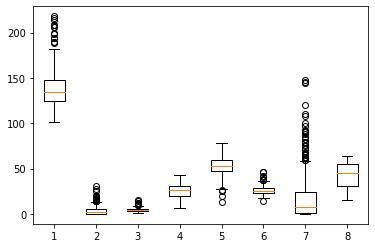

Number of subjects with family history of chd: 192
Number of subjects with family history of chd: 270


In [18]:
data = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
data = pd.DataFrame([file[col] for col in data]).T
plt.boxplot(data)
plt.show()

print(f"Number of subjects with family history of chd: {len([1 for val in file['famhist'] if val == 'Present'])}")
print(f"Number of subjects with family history of chd: {len([1 for val in file['famhist'] if val != 'Present'])}")

### Histograms of datapoints
These are used det determine whether data is normally distributed or not. Aswell as looking at outliers.

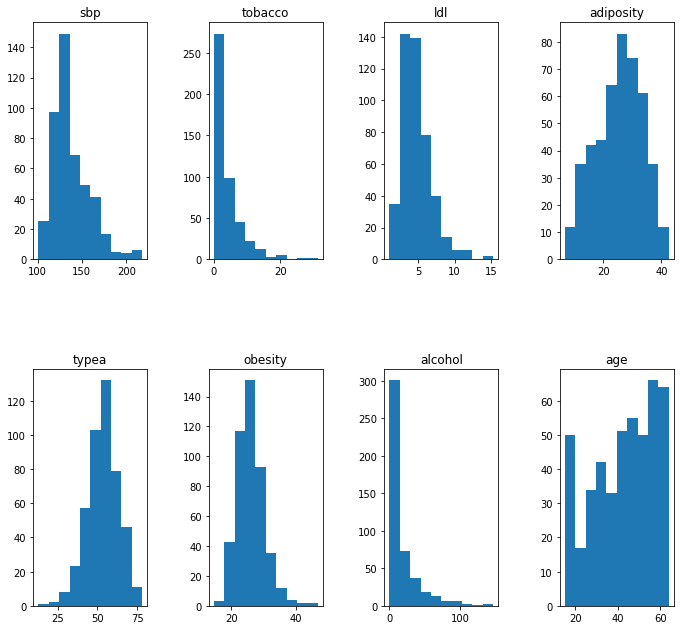

In [19]:
fig, axs = plt.subplots(2,4)
axs[0,0].hist(data['sbp'])
axs[0,0].set_title('sbp')
axs[0,1].hist(data['tobacco'])
axs[0,1].set_title('tobacco')
axs[0,2].hist(data['ldl'])
axs[0,2].set_title('ldl')
axs[0,3].hist(data['adiposity'])
axs[0,3].set_title('adiposity')
axs[1,0].hist(data['typea'])
axs[1,0].set_title('typea')
axs[1,1].hist(data['obesity'])
axs[1,1].set_title('obesity')
axs[1,2].hist(data['alcohol'])
axs[1,2].set_title('alcohol')
axs[1,3].hist(data['age'])
axs[1,3].set_title('age')
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()


### Boxplot of normalized data

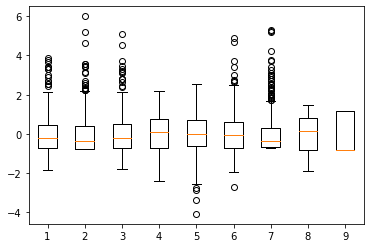

In [20]:
cont_cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
cont_data = pd.DataFrame([file[col] for col in cont_cols]).T
famhist = [1 if val == 'Present' else 0 for val in file['famhist']]
cont_data['famhist'] = famhist
cont_data = pd.DataFrame(zscore(cont_data, ddof=1))
cont_cols.append('famhist')
cont_data.columns = cont_cols

plt.boxplot(cont_data)
plt.show()

### PCA function

In [21]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
pcsT = pca.fit_transform(cont_data)
pcs = [pc for pc in pcsT.T]
pca.components_

array([[ 0.32375128,  0.30183439,  0.33392218,  0.51629643, -0.0183216 ,
         0.40147338,  0.12142135,  0.46008104,  0.19514307],
       [ 0.23829995,  0.45850912, -0.3639135 , -0.18761714, -0.28218155,
        -0.39190548,  0.54301526,  0.19304296,  0.0013409 ]])

### Plot of principal components

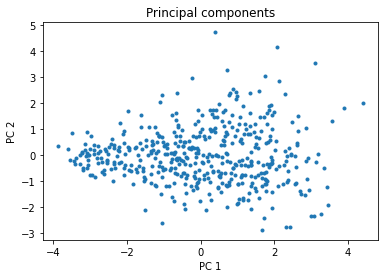

In [22]:
plt.plot(pcs[0], pcs[1], '.')
plt.title("Principal components")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

### Split data plot of principal components
Here the data projections are seperated in to "healthy" data and "disease" data. (In blue and red respectivly)

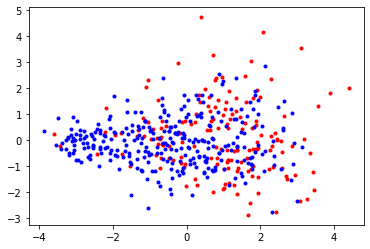

In [23]:
def split_plot(data: list, pca = True):
    if not pca:
        data = np.array([data[0], data[1]]).T  
    disease_data = list()
    healthy_data = list()
    for i in range(len(file['chd'])):
        if file['chd'][i] == 1:
            disease_data.append(data[i])
        else:
            healthy_data.append(data[i])

    pcs_disease = [pc for pc in np.array(disease_data).T]
    pcs_healthy = [pc for pc in np.array(healthy_data).T]

    plt.plot(pcs_disease[0], pcs_disease[1],'r.', label = 'Heart disease')
    plt.plot(pcs_healthy[0], pcs_healthy[1],'b.', label = 'Healthy')

split_plot(pcsT)

### Explained variance of principal components

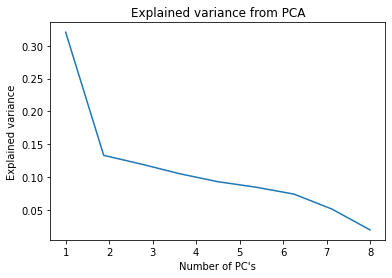

In [28]:
n_components = 9
pca = PCA(n_components=n_components)
pcsT = pca.fit_transform(cont_data)

plt.plot(np.linspace(1,8,9, endpoint=True), (pca.explained_variance_ratio_))
plt.title("Explained variance from PCA")
plt.xlabel("Number of PC's")
plt.ylabel("Explained variance")
plt.show()

### Initial (and non-mathematical) classification of data based on PCA

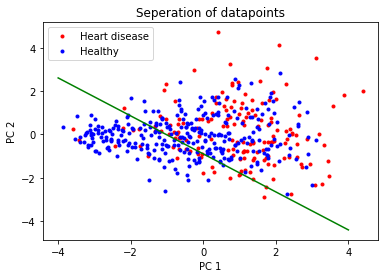

In [27]:
split_plot(pcsT)
x = np.linspace(start=-4,stop=4,num=200)
f = lambda x: -0.88*x-0.9
plt.plot(x,f(x), 'green')
plt.title('Seperation of datapoints')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()